<a href="https://colab.research.google.com/github/macollipal/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

## Cargar dataFrame

importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

In [11]:
import requests
import pandas as pd

#df = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')
#df.head()

"""Carga JSON desde URL"""
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    print(f"✅ Datos cargados: {len(data) if isinstance(data, list) else 1} registros")
else:
    print("Error al obtener los datos:", response.status_code)

#data


✅ Datos cargados: 7267 registros


#🔧 Transformación

### **Conocer el conjunto de datos**

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.
¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.
✅ Consultar el diccionario para comprender mejor el significado de las variables.
✅ Identificar las columnas más relevantes para el análisis de evasión.


#### **Columnas más importantes para predecir Churn**

Basándome en la información de las columnas que tienes, estas serían las columnas más importantes para predecir Churn, ordenadas por relevancia típica:
Columnas de Alta Importancia

**1. Variables de Contrato y Facturación**

account_contract - Tipo de contrato (mensual vs anual)
account_charges_monthly - Cargos mensuales
account_charges_total - Cargos totales históricos
account_paymentmethod - Método de pago

**2. Variables de Tenure y Demografía**

customer_tenure - Tiempo como cliente (muy importante)
customer_seniorcitizen - Cliente senior
customer_partner - Tiene pareja
customer_dependents - Tiene dependientes

***Columnas de Importancia Media***

**3. Variables de Servicios de Internet**

internet_internetservice - Tipo de servicio de internet
internet_onlinesecurity - Seguridad online
internet_techsupport - Soporte técnico
internet_onlinebackup - Respaldo online

**4. Variables de Servicios de Teléfono**

phone_phoneservice - Servicio telefónico
phone_multiplelines - Múltiples líneas

***Columnas de Menor Importancia***

internet_deviceprotection
internet_streamingtv
internet_streamingmovies
account_paperlessbilling
customer_gender

#### **Columnas clave para empezar tu análisis**
key_features = [
    'customer_tenure',
    'account_contract',
    'account_charges_monthly',
    'account_charges_total',
    'internet_internetservice',
    'customer_seniorcitizen',
    'internet_techsupport',
    'internet_onlinesecurity'
]

### **Comprobación de incoherencias en los datos**
En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.
📌 Tips:

🔗 Documentación de pandas.unique()
🔗 Documentación de pandas.Series.dt.normalize()

In [12]:
#"""Normaliza JSON anidado a DataFrame"""
# Import json_normalize from pandas
from pandas import json_normalize

if isinstance(data, list):
    df = json_normalize(data)
else:
    df = json_normalize([data])

# Limpiar nombres de columnas
df.columns = df.columns.str.replace('.', '_', regex=False)
df.columns = df.columns.str.lower()

print(f"✅ DataFrame creado: {df.shape[0]} filas × {df.shape[1]} columnas")
display(df.head(3))

✅ DataFrame creado: 7267 filas × 21 columnas


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [13]:
df['customerid'].unique()

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [15]:
df.dtypes

,0
customerid,object
churn,object
customer_gender,object
customer_seniorcitizen,int64
customer_partner,object
customer_dependents,object
customer_tenure,int64
phone_phoneservice,object
phone_multiplelines,object
internet_internetservice,object


In [16]:
df.select_dtypes(include='object').columns

Index(['customerid', 'churn', 'customer_gender', 'customer_partner',
       'customer_dependents', 'phone_phoneservice', 'phone_multiplelines',
       'internet_internetservice', 'internet_onlinesecurity',
       'internet_onlinebackup', 'internet_deviceprotection',
       'internet_techsupport', 'internet_streamingtv',
       'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_total'],
      dtype='object')

In [17]:
# prompt: mostrar cuantos registros son nulos o vacios en la columna churn

# Calculate the number of null or empty values in the 'churn' column
null_or_empty_churn = df['churn'].isnull().sum() + (df['churn'] == '').sum() + (df['churn'] == 0).sum()

print(f"Número de registros nulos o vacíos en la columna 'churn': {null_or_empty_churn}")

# Display the current state of the DataFrame info after previous filtering
#df.info()

Número de registros nulos o vacíos en la columna 'churn': 224


In [18]:
# prompt: eliminar nulos cuando la columna churn este vacia o nula 0 ""

import numpy as np

df = df[df['churn'].notna()]
df = df[df['churn'] != '']
df = df[df['churn'] != 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   object 
 5   customer_dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   object 
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   object 
 1

In [19]:
# prompt: en el dtype sigue apareciendo tiypo object la comuna crurn

df['churn'] = df['churn'].astype(str)
#df.info()


### **Manejo de inconsistencias**
 Aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [20]:
# prompt: account_charges_total a float64

import pandas as pd
df['account_charges_total'] = pd.to_numeric(df['account_charges_total'], errors='coerce')
df['account_charges_total'] = df['account_charges_total'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   object 
 5   customer_dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   object 
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   object 
 1

### **Estandarización y transformación de datos (opcional)**
La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.
Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [21]:
# Convert specified columns to binary (1 for 'Yes', 0 for 'No')
binary_cols = ['churn', 'customer_partner', 'customer_dependents', 'phone_phoneservice', 'account_paperlessbilling']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

# Display the first few rows to verify the transformation
print("DataFrame with binary columns:")
display(df[binary_cols].head())

# Display the data types to confirm the change
print("\nData types after transformation:")
df.info()

DataFrame with binary columns:


,churn,customer_partner,customer_dependents,phone_phoneservice,account_paperlessbilling
0,0,1,1,1,1
1,0,0,0,1,0
2,1,0,0,1,1
3,1,1,0,1,1
4,1,1,0,1,1



Data types after transformation:
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsuppor

### **Columna de cuentas diarias**
Ahora que los datos están limpios, es momento de crear la columna **"Cuentas_Diarias"**. Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.**Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.**

In [22]:
# prompt: Utiliza la facturación mensual para calcular el valor diario, solo 2 decimales, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

# Asumimos que el mes tiene 30 días para un cálculo diario aproximado.
# Calcula el valor diario dividiendo los cargos mensuales por 30.
# Redondea a 2 decimales para mantener precisión financiera.
df['account_charges_daily'] = (df['account_charges_monthly'] / 30).round(2)

print("\nPrimeras 5 filas con la nueva columna 'account_charges_daily':")
display(df[['account_charges_monthly', 'account_charges_daily']].head())

print("\nInformación del DataFrame después de añadir 'account_charges_daily':")
df.info()


Primeras 5 filas con la nueva columna 'account_charges_daily':


,account_charges_monthly,account_charges_daily
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80



Información del DataFrame después de añadir 'account_charges_daily':
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   int64  
 5   customer_dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   int64  
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-nul

In [23]:
df

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,account_charges_daily
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,No,DSL,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,1,0,22,1,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,0,0,2,1,No,DSL,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,1,1,67,1,No,DSL,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.26


In [24]:
df.describe()


,churn,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,account_paperlessbilling,account_charges_monthly,account_charges_total,account_charges_daily
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [26]:
# Guardar CSV (opcional)
df.to_csv('datos_normalizados.csv', index=False, decimal=',',sep=';', mode='w')
#print(f"\n💾 Archivo guardado: datos_normalizados.csv")

# Para descargar en Colab
from google.colab import files
files.download('datos_normalizados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#📊 Carga y análisis

##Distrubución de evasión

In [40]:
import plotly.express as px
df_plano=df

In [41]:
churn_counts = df_plano['churn'].value_counts().reset_index()
churn_counts.columns = ['churn', 'count']

fig = px.pie(churn_counts,
             values='count',
             names='churn',
             title='Distribución de Churn')
fig.update_traces(textposition='inside', textinfo='percent+label')

# Agregar una anotación o leyenda explicativa personalizada
fig.add_annotation(
    text="una tasa de evasión significativa, cercana a 1 de cada 4 clientes",
    x=0.5,
    y=-0.15,
    showarrow=False,
    font=dict(size=14),
    align='center'
)

fig.show()

In [56]:
px.histogram(df_plano, x='customer_gender',text_auto=True, color='churn', barmode='group')


In [43]:
import plotly.express as px

fig = px.histogram(df_plano,
                   x='customer_seniorcitizen',
                   color='churn',
                   text_auto=True,
                   barmode='group',
                   title='Churn según condición de adulto mayor',
                   labels={'customer_seniorcitizen': 'Adulto mayor (0 = No, 1 = Sí)'})

fig.update_layout(xaxis_title='Adulto mayor', yaxis_title='Cantidad')
fig.show()


In [43]:
px.histogram(df_plano, x='customer_seniorcitizen',text_auto=True, color='churn', barmode='group')

In [44]:
px.histogram(df_plano, x='customer_tenure',text_auto=True, color='churn', barmode='group')

In [45]:
# Agrupar por tenure y churn
df_grouped=df_plano.groupby(['customer_tenure', 'churn']).size().unstack(fill_value=0)
print(df_grouped)

#calcular el % de crurn por tenure
df_grouped['churn_rate'] = (df_grouped.get('Yes',1) / df_grouped.sum(axis= 1))*100

#mostrar resultado
print(df_grouped[['churn_rate']])

churn              0    1
customer_tenure          
0                 11    0
1                233  380
2                115  123
3                106   94
4                 93   83
...              ...  ...
68                91    9
69                87    8
70               108   11
71               164    6
72               356    6

[73 rows x 2 columns]
churn            churn_rate
customer_tenure            
0                  9.090909
1                  0.163132
2                  0.420168
3                  0.500000
4                  0.568182
...                     ...
68                 1.000000
69                 1.052632
70                 0.840336
71                 0.588235
72                 0.276243

[73 rows x 1 columns]


In [46]:
fig=px.line(df_grouped.reset_index(),
            x='customer_tenure',
            y='churn_rate',
            markers=True,
            title='Tasa de Churn por Tenure')
fig.show()

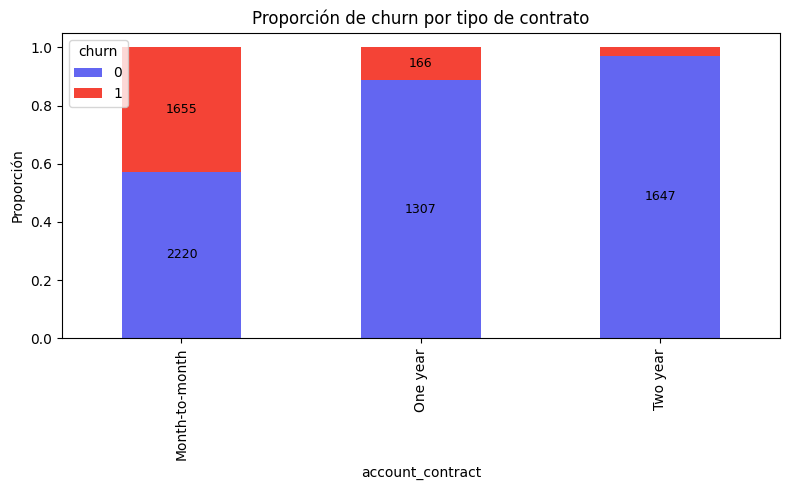

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Calculate crosstabulation and absolute counts
crosstab = pd.crosstab(df['account_contract'], df['churn'], normalize='index')
crosstab_abs = pd.crosstab(df['account_contract'], df['churn'])

ax = crosstab.plot(kind='bar', stacked=True, figsize=(8,5), color=['#6366F1', '#F44336'])

# Agregar valores encima de las barras si hay espacio suficiente
for i, tipo_contrato in enumerate(crosstab.index):
    bottom = 0
    for j, valor in enumerate(crosstab_abs.columns):
        cantidad = crosstab_abs.loc[tipo_contrato, valor] # Use crosstab_abs for counts
        proporción = crosstab.loc[tipo_contrato, valor] # Use crosstab for proportions
        if proporción > 0.05:  # solo mostrar si es suficientemente grande
            ax.text(i, bottom + proporción / 2, str(cantidad), ha='center', va='center', fontsize=9, color='black')
        bottom += proporción

plt.title('Proporción de churn por tipo de contrato')
plt.ylabel('Proporción')
plt.tight_layout()
plt.show()

In [47]:
px.scatter(df_plano
           , x='customer_tenure'
           , y='account_charges_monthly'
           , color='churn'
           , title="Tenure vs Cargos mensuales por Churn")

In [48]:
px.histogram(df_plano, x = 'account_contract', text_auto = True, color = 'churn', barmode = 'group')

In [49]:
px.histogram(df_plano, x = 'phone_phoneservice', text_auto = True, color = 'churn', barmode = 'group')

In [50]:
px.histogram(df_plano, x = 'internet_internetservice', text_auto = True, color = 'churn', barmode = 'group')

In [51]:
px.histogram(df_plano, x = 'account_paymentmethod', text_auto = True, color = 'churn', barmode = 'group')

In [52]:
px.box(df_plano, x = 'churn', y = 'account_charges_monthly', color = 'churn')

#📄Informe final

In [55]:
# Guardar CSV (opcional)
#df_plano.to_csv('datos_normalizados.csv', index=False, decimal=',',sep=';', mode='w')
#print(f"\n💾 Archivo guardado: datos_normalizados.csv")

# Para descargar en Colab
#from google.colab import files
#files.download('datos_normalizados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Reporte Final: Análisis de Churn en Clientes de Telecom X**

**Objetivo del Análisis**  
Identificar los factores y combinaciones de variables que mejor explican la evasión de clientes (churn), con el fin de orientar acciones de retención para Telecom X.

---

**Resumen General**
- La tasa de churn global en la base de datos es del **26.5%**.
- Existen patrones claros asociados a variables como tipo de contrato, método de pago, antigüedad y acceso a soporte técnico.

---

**Análisis por Variables Individuales**

1. **Tipo de contrato:**
   - Clientes con contrato "Month-to-month" tienen una tasa de churn de **42.7%**.
   - Contratos de "Two year" solo presentan un **2.8%** de churn.

2. **Método de pago:**
   - El churn más alto está entre quienes pagan con "Electronic check" (**53.7%** si combinamos con contrato mes a mes).
   - Métodos automáticos, como tarjeta de crédito, tienen tasas considerablemente menores.

3. **Antigüedad del cliente:**
   - Clientes con menos de 12 meses presentan churn del **60.3%** si no cuentan con soporte técnico.

4. **Soporte técnico:**
   - La falta de soporte está directamente asociada a mayores tasas de churn, especialmente en clientes nuevos o de bajo consumo.

5. **Monto mensual facturado:**
   - Clientes con cargos mensuales entre 61 y 90 sin soporte técnico tienen un churn del **46.6%**.

---

**Combinaciones Críticas Identificadas**

| Combinación                          | Tasa de Churn |
|-------------------------------------|----------------|
| Month-to-month + Electronic check   | 53.7%          |
| Tenure 0-12 meses + sin soporte     | 60.3%          |
| Cargos $61-90 + sin soporte         | 46.6%          |

---

**Recomendaciones**

1. **Estrategia de retención personalizada** para clientes con contrato "Month-to-month" y pago vía cheque electrónico.
2. **Campañas de onboarding** y contacto proactivo para clientes nuevos sin soporte.
3. **Ofertas de upgrade de plan** o beneficios para quienes tienen cargo mensual alto sin soporte.
4. **Promoción de contratos de mayor plazo** ("One year" o "Two year") con beneficios visibles.
5. **Fomento del uso de pagos automáticos**, especialmente en clientes con alta propensión al churn.

---

**Conclusión**  
Este análisis permite detectar con claridad segmentos de alto riesgo de churn. Al enfocarse en combinaciones críticas de contrato, antigüedad, soporte y tipo de pago, Telecom X puede implementar estrategias más eficaces y prevenir la pérdida de clientes.


In [48]:
import plotly.express as px

# Filtrar solo los clientes con contrato Month-to-month y pago por Electronic check
df_filtro = df_plano[
    (df_plano['account_contract'] == 'Month-to-month') &
    (df_plano['account_paymentmethod'] == 'Electronic check')
]

# Crear gráfico de barras con churn
fig = px.histogram(df_filtro,
                   x='account_paymentmethod',
                   color='churn',
                   barmode='group',
                   title='Churn en clientes Month-to-month + Electronic check',
                   labels={'churn': 'Churn', 'account_paymentmethod': 'Método de pago'})
fig.update_layout(xaxis_title='Método de pago', yaxis_title='Cantidad')
fig.show()


In [51]:
import pandas as pd
import plotly.express as px

# Crear columna de rangos de antigüedad
df_plano['tenure_rango'] = pd.cut(
    df_plano['customer_tenure'],
    bins=[0, 12, 24, 36, 60, 72],
    labels=['0-12', '13-24', '25-36', '37-60', '61-72']
)

# Filtrar clientes con 0-12 meses y sin soporte técnico
df_filtro_tenure = df_plano[
    (df_plano['tenure_rango'] == '0-12') &
    (df_plano['internet_techsupport'] == 'No')
]

# Crear gráfico de churn en este grupo
fig = px.histogram(df_filtro_tenure,
                   x='tenure_rango',
                   color='churn',
                   barmode='group',
                   title='Churn en clientes con 0-12 meses de antigüedad + sin soporte técnico',
                   labels={'churn': 'Churn', 'tenure_rango': 'Antigüedad'})
fig.update_layout(xaxis_title='Rango de antigüedad', yaxis_title='Cantidad')
fig.show()


In [52]:
import pandas as pd
import plotly.express as px

# Crear columna con rango de cargos mensuales
df_plano['monthly_rango'] = pd.cut(
    df_plano['account_charges_monthly'],
    bins=[0, 30, 60, 90, 120],
    labels=['0-30', '31-60', '61-90', '91-120']
)

# Filtrar clientes con cargo mensual de 61-90 y sin soporte técnico
df_filtro_monto = df_plano[
    (df_plano['monthly_rango'] == '61-90') &
    (df_plano['internet_techsupport'] == 'No')
]

# Crear el gráfico
fig = px.histogram(df_filtro_monto,
                   x='monthly_rango',
                   color='churn',
                   barmode='group',
                   title='Churn en clientes con cargos mensuales $61-90 + sin soporte técnico',
                   labels={'churn': 'Churn', 'monthly_rango': 'Rango de cargo mensual'})
fig.update_layout(xaxis_title='Rango de cargo mensual', yaxis_title='Cantidad')
fig.show()
